# Relax Take-home Challenge
I am given users and users' activity/logged in information. The purpose of this project is to **identify which factors predict future user adoption**. User adoption (adopted user) is defined as logging in 3 separate times in at least one seven-day period.

# 1. Import Libraries and Dataset

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set white grid styling
sns.set_style('whitegrid')
sns.set(font_scale=1) # Font size

# Ignore third-party warnings
import warnings
warnings.filterwarnings('ignore')

In [112]:
# Import datasets
user_df = pd.read_csv('takehome_users.csv', parse_dates=['creation_time'], encoding='ISO-8859-1')
engagement_df = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])

## 1.1 User Dataset
Contains 12,000 users' information who signed up for the product in the last two years. It contains how and when their account was created, last login, etc. 

In [113]:
user_df.head(1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0


In [114]:
# Convert last_session_creation_time column into datetime
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'], unit='s')

In [115]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [116]:
user_df.head(1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0


User dataframe has missing data in the **last_Session_creation_time** and **invited_by_user_id** dataframe

## 1.2. Engagement Dataset
Engagement dataset contains summary of how often users logged in for each day.

In [117]:
engagement_df.head(1)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1


In [118]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


## 2. Data Wrangling
Defining whether user is an adopted user or not by utilizing both user and engagement dataframe. Adopted user is defined as a user who has logged into the product on three separate days in at least one seven-day period.

### User

In [119]:
# Create new column called 'adopted_user'
user_df['adopted_user'] = 0 # Set 0 by default

# Rename 'object_id' column name to 'user_id' to be same as engagement's 'user_id' column
user_df.rename(columns={'object_id': 'user_id'}, inplace=True)

# Set user_id column as index 
user_df.set_index('user_id', inplace=True)

In [120]:
user_df.head(3)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0


In [121]:
# One hot encode 'creation_source'
user_df = pd.get_dummies(user_df, columns=['creation_source'], prefix='s_')

# Lowercase all column names
user_df.columns = user_df.columns.str.lower()
user_df.head(3)

,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,s__guest_invite,s__org_invite,s__personal_projects,s__signup,s__signup_google_auth
user_id,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,0,1,0,0,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,0,0,1,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,0,1,0,0,0


In [122]:
# Fill in missing data in 'invited_by_user_id' column by creating 'invited' column and imputing binary values
user_df['invited'] = user_df['invited_by_user_id'].apply(lambda val: 0 if np.isnan(val) else 1)

# Remove 'invited_by_user_id' column as it is not needed to predict whether user will be adopted user or not
user_df.drop(['invited_by_user_id'], axis=1, inplace=True)

In [123]:
user_df['invited'].value_counts()

1    6417
0    5583
Name: invited, dtype: int64

### Engagement
We now need to look at user engagement dataframe to fill in values onto user dataframe's 'adopted_user' column

In [124]:
engagement_df.head(3)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1


In [125]:
# Set 'time_stamp' column as datetime index
engagement_df = engagement_df.set_index(pd.DatetimeIndex(engagement_df['time_stamp']))

# Group by 'user_id' column, resample by 1 week, and total up the frequency of visits per week
engagement_df = engagement_df.groupby('user_id').resample('1W').sum()

In [126]:
engagement_df.head(10)

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0
        2013-12-15        2        1
        2013-12-22        0        0
        2013-12-29        2        1
        2014-01-05        2        1
        2014-01-12        2        1

In [127]:
# Identify users that had 3 or more visits per wee
engagement_df = engagement_df['visited'] >= 3
engagement_df = engagement_df.groupby(level=0).apply(np.sum)

# Remove users that does not have any weeks with 3 or more visits
engagement_df = engagement_df[engagement_df != 0]

In [128]:
# Create new engagement dataframe
adopted_users_df = pd.DataFrame(engagement_df,index=engagement_df.index)

# Rename 'visited' to 'active_weeks'
adopted_users_df.rename(columns={'visited': 'active_weeks'}, inplace=True)

In [129]:
# Get min and max values
min_val = adopted_users_df['active_weeks'].min()
max_val = adopted_users_df['active_weeks'].max()

In [130]:
# Scaling values between 0 to 1 (MinMaxScaler)
def min_max_scaler(val, min_val, max_val):
    '''
    Normalizes values between 0 to 1.
    
    Parameter
    ---------
    val: int
    df: pandas.DataFrame
    Returns
    -------
    num: float64
        Returns value between 0 to 1 
        
    '''
    # Scale
    return (val - min_val) / (max_val - min_val)

adopted_users_df['active_weeks'] = adopted_users_df['active_weeks'].apply(lambda val: min_max_scaler(val, min_val, max_val))

In [131]:
adopted_users_df

,active_weeks
user_id,
2,0.000000
10,0.548387
20,0.000000
33,0.000000
42,0.720430
...,...
11965,0.000000
11967,0.075269
11969,0.225806


In [132]:
# Setting as 1 to 'adopted_user' column (identifying adopted users)
user_df.loc[adopted_users_df.index, 'adopted_user'] = 1

In [133]:
# Add 'active_weeks' column 
user_df = user_df.merge(adopted_users_df,left_index=True,on='user_id',how='outer')

# Fill NaN with 0 in 'active_weeks' columns
user_df['active_weeks'] = user_df['active_weeks'].fillna(value=0)
user_df.head()

,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,s__guest_invite,s__org_invite,s__personal_projects,s__signup,s__signup_google_auth,invited,active_weeks
user_id,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,0,1,0,0,0,0,1,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,1,0,1,0,0,0,1,0.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,0,0,1,0,0,0,1,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,0,1,0,0,0,0,1,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,0,1,0,0,0,0,1,0.0


### Resolving NaN in users' 'last_session_creation_time' column

In [134]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   adopted_user                12000 non-null  int64         
 8   s__guest_invite             12000 non-null  uint8         
 9   s__org_invite               12000 non-null  uint8         
 10  s__personal_projects        12000 non-null  uint8         
 11  s__signup                   12000 non-null  uint8     

In [135]:
# Check if NaTs are coming from 'adopted' users
# Retrieve rows that contains NaTs on 'last_session_creation_time' column AND is adopted user
len(user_df.loc[(user_df['last_session_creation_time'].isnull()) & (user_df['adopted_user'] == 1)])

0

Seeing the result above, NaTs are from 'non-adopted' users. Since we are concerned with identifying 'adopted users', rows with NaT can be dropped.

In [136]:
user_df.dropna(inplace=True) 

## 3. EDA
With clean dataframe, let's explore our data through visualizations.

There are 1445 adopted users and 7378 non-adopted users.

<AxesSubplot:>

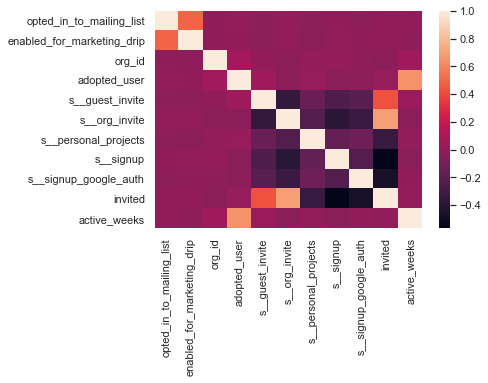

In [137]:
# Check for correlation
sns.heatmap(user_df.corr())

In [138]:
user_df.corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,s__guest_invite,s__org_invite,s__personal_projects,s__signup,s__signup_google_auth,invited,active_weeks
opted_in_to_mailing_list,1.000000,0.488219,-0.002421,0.009473,-0.005193,0.011235,-0.005339,0.002632,-0.008198,0.006828,0.004414
enabled_for_marketing_drip,0.488219,1.000000,0.000538,0.003733,-0.007691,0.009502,-0.018095,0.011159,-0.003042,0.003231,-0.000879
org_id,-0.002421,0.000538,1.000000,0.070061,0.001533,-0.018061,0.010924,0.015432,-0.003645,-0.016230,0.052155
adopted_user,0.009473,0.003733,0.070061,1.000000,0.052554,-0.019840,0.023821,-0.026719,-0.017537,0.021391,0.649791
s__guest_invite,-0.005193,-0.007691,0.001533,0.052554,1.000000,-0.352386,-0.144249,-0.245270,-0.202164,0.431261,0.034408
s__org_invite,0.011235,0.009502,-0.018061,-0.019840,-0.352386,1.000000,-0.231589,-0.393777,-0.324570,0.692383,-0.015736
s__personal_projects,-0.005339,-0.018095,0.010924,0.023821,-0.144249,-0.231589,1.000000,-0.161192,-0.132863,-0.334481,0.007798
s__signup,0.002632,0.011159,0.015432,-0.026719,-0.245270,-0.393777,-0.161192,1.000000,-0.225910,-0.568727,-0.025172
s__signup_google_auth,-0.008198,-0.003042,-0.003645,-0.017537,-0.202164,-0.324570,-0.132863,-0.225910,1.000000,-0.468773,0.006847
invited,0.006828,0.003231,-0.016230,0.021391,0.431261,0.692383,-0.334481,-0.568727,-0.468773,1.000000,0.011357


By inspecting correlation matrix, we can see that 'enabled_for_marketing_drip' and 'opted_in_to_mailing_list' has strong correlation. Furthermore, 'active_weeks' and 'adopted_user' has correlation as well.

Inspecting adopted and non-adopted users count and checking if there is correlation between 'last_session_creation_time' and 'adopted_user' columns.

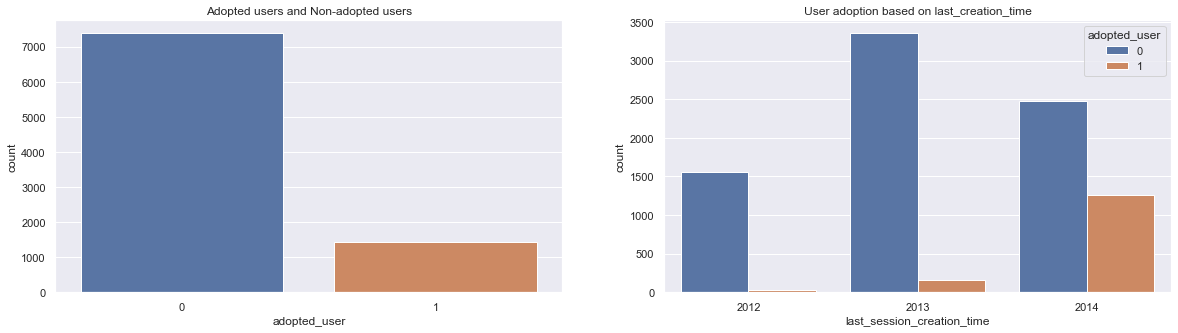

In [139]:
# Check numerical and datetime columns
plt.figure(figsize=(20,5));
ax_one = plt.subplot(1,2,1) # nrows, ncols, index
ax_one = sns.countplot(x='adopted_user', data=user_df, ax=ax_one)
ax_one.set_title('Adopted users and Non-adopted users');

ax_two = plt.subplot(1,2,2)
ax_two = sns.countplot(x=user_df['last_session_creation_time'].dt.year, hue=user_df['adopted_user'],ax=ax_two)
ax_two.set_title('User adoption based on last_creation_time');

In [140]:
user_df['adopted_user'].value_counts()

0    7378
1    1445
Name: adopted_user, dtype: int64

There are 7378 non-adopted users and 1445 adopted users (19.58% adoption rate). From the visualization above, it looks like users with more recent activities on the product have higher adoption rate. This suggests that finding difference between 'creation_date' and 'last_session_creation_time' (time delta) can be useful in identifying adopted users (Users are more likely to be adopted users since they are active with the product).

### Feature Engineering
We got user activities data in 'active_weeks' column and in the following cells, we will be creating new column time delta where it represents the time difference between a user's last ssesion and their account creation date.

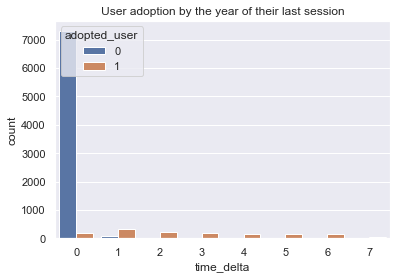

In [141]:
user_df['time_delta'] = user_df['last_session_creation_time'] - user_df['creation_time']

ax = sns.countplot(x=user_df['time_delta'].dt.days//100, hue=user_df['adopted_user'])
ax.set_title('User adoption by the year of their last session');

As shown above, 'Time delta' less than 100 days are more likely to be non-adopted users while users with more than 200 days are likely to be adopted users. Since we are done with feature engineering and cleaned the dataframe, we will be removing columns that are no longer needed.

In [142]:
# Remove columns that are not needed for model
user_df.drop(['creation_time','name','email','last_session_creation_time','org_id'],axis=1, inplace=True)

In [143]:
user_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,s__guest_invite,s__org_invite,s__personal_projects,s__signup,s__signup_google_auth,invited,active_weeks,time_delta
user_id,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,1,0.0,0 days
2,0,0,1,0,1,0,0,0,1,0.0,136 days
3,0,0,0,0,1,0,0,0,1,0.0,0 days
4,0,0,0,1,0,0,0,0,1,0.0,1 days
5,0,0,0,1,0,0,0,0,1,0.0,5 days


In [144]:
# Normalize 'time_delta' column between 0 - 1
user_df['time_delta'] = user_df['time_delta'].apply(lambda x: x.days) # Get integer values

# Get min and max values
min_val = user_df['time_delta'].min()
max_val = user_df['time_delta'].max()

# Normalize
user_df['time_delta'] = user_df['time_delta'].apply(lambda val: min_max_scaler(val, min_val, max_val))

## 4. ML Modeling
We will be using three different machine learning algorithms in predicting user adoption:
* Random Forest
* Support Vector Machine (SVM)
* Logistic Regression

Since we are dealing with imbalanced dataset with 7378 non-adopted users and 1445 adopted users, we will be evaluating model performance based on ROC/AUC and F1-score instead of accurarcy score.

In [172]:
from sklearn.model_selection import train_test_split # Splitting train and test dataset (70/30 ratio)
from sklearn.model_selection import RandomizedSearchCV # Used for hyperparmeter tuning

# F1-score: weighted harmoic mean of test's precision and recall
# ROC/AUC - maps consolidated information from a ton of confusion matrices int single, easy to interpret graph
from sklearn.metrics import f1_score, roc_auc_score

# Classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [162]:
# Used for logging model performance
score_table_df = pd.DataFrame(index=['RandomForest','SVC','LogisticRegression'], 
                              columns= ['f1_score_train','auc_train','f1_score_test','auc_test'])

# Extract features and target
X = user_df.drop(['adopted_user'],axis=1)
y = user_df['adopted_user']

# stratify, ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42) # default 75% train 25% test

In [163]:
# define function for plotting the results
def log_result(algo, pred_train, pred_test):
    '''
    Inputs and logs the performance for both training/test sets.
    
    Parameter
    ---------
    algo: str
        ML algorithm name
    pred_train: numpy.ndarray
        train prediction scores
    pred_test: numpy.ndarray
        test prediction scores
    '''
    # compute the performance
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    auc_train = roc_auc_score(y_train, pred_train)
    auc_test = roc_auc_score(y_test, pred_test)
    
    # log the performance
    score_table_df.loc[algo,:] = f1_train, auc_train, f1_test, auc_test

### Checking Baseline Model Performance

In [167]:
# Instantiate all ML algorithms
rf = RandomForestClassifier(class_weight='balanced') # instantiate and adjust for imbalanced dataset
lr = LogisticRegression()
svc = SVC()

# Train
rf.fit(X_train, y_train)
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

# Log model performance
log_result("RandomForest", pred_train, pred_test)

In [168]:
# SVC
# Train
svc.fit(X_train, y_train)
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

# Log model performance
log_result("SVC", pred_train, pred_test)

In [169]:
# LOGISTIC REGRESSION
# Train
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

# Log model performance
log_result("LogisticRegression", pred_train, pred_test)

In [170]:
score_table_df

,f1_score_train,auc_train,f1_score_test,auc_test
RandomForest,0.971377,0.988744,0.875,0.93162
SVC,0.894477,0.915014,0.884273,0.908677
LogisticRegression,0.885312,0.903735,0.868902,0.892027


### Hyperparameter Tuning the Random Forest
Based on overall AUC score, Random Forest model resulted with best score using default parameters. We will be tuning Random Forest using RandomizedSearchCV.

In [173]:
# RANDOM FOREST PARAMETERS

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [175]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier() # First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=42, verbose=2)

In [176]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [177]:
rf_random.best_score_

0.9788422148349619

In [180]:
# Update Random Forest using best parameters
rf = RandomForestClassifier(n_estimators=20, 
                            min_samples_split=5,
                            min_samples_leaf=4,
                            max_features='sqrt',
                            max_depth=70,
                            bootstrap=True,
                            class_weight='balanced')

rf.fit(X_train,y_train)
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

log_result("RandomForest", pred_train, pred_test)

In [181]:
score_table_df.loc['RandomForest']

f1_score_train    0.931979
auc_train         0.975328
f1_score_test     0.884021
auc_test          0.955557
Name: RandomForest, dtype: object

In [184]:
rf.feature_importances_

array([0.00195907, 0.00159744, 0.00255073, 0.00068576, 0.00067314,
       0.00076942, 0.00070331, 0.00063792, 0.40243354, 0.58798967])

In [185]:
# feature importance ranking from the optimized RandomForestClassifier 
rank_df = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
print(rank_df.sort_values(by='importance',ascending=False))

                      feature  importance
9                  time_delta    0.587990
8                active_weeks    0.402434
2             s__guest_invite    0.002551
0    opted_in_to_mailing_list    0.001959
1  enabled_for_marketing_drip    0.001597
5                   s__signup    0.000769
6       s__signup_google_auth    0.000703
3               s__org_invite    0.000686
4        s__personal_projects    0.000673
7                     invited    0.000638


## Summary
Through RandomSearchCV, made approximately 3% improvement on AUC score and 1% improvement for F1-score. As it is shown above, time_delta and active_weeks came out to be best predictors in identifying adopted users.